In [ ]:
!pip uninstall lime -y
!pip install git+https://github.com/palatos/lime@ColorExperiments

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import preprocess_input

from lime import lime_image

from skimage.segmentation import mark_boundaries

In [3]:
model = tf.keras.models.load_model('/mnt/nas2/results/IntermediateResults/Mara/MELBA/baseline_def_1/best_model.h5', compile=False)
model.layers[-1].activation = tf.keras.activations.sigmoid
model.compile()

In [4]:
#We don't directly use the base model because we want to be sure we are perturbing the images before preprocessing them.
#Otherwise covering the superpixels in 0 might not mean covering them in black.
#Best way to control this is to just define a wrapper-like class around the model, that includes the preprocessing in it.
#I'm also converting the sigmoid output to softmax-like because that's generally easier to handle and debug in LIME.
#GradCAM doesn't care about any of this so we can just use the model directly.

class MyModel():
    def __init__(self,model):
        self.model = model
        self.input_shape = model.input_shape
        self.output_shape = model.output_shape
        
    def predict(self, batch_images):
        
        #Image must be preprocessed before passed to LIME.
        batch_images = preprocess_input(batch_images.copy()) 
        
        sigm = self.model.predict(batch_images)
        
        softm = np.hstack((1-sigm,sigm))
        
        return softm


model_with_preprocessing = MyModel(model)

In [6]:
import skimage.segmentation

def segments_quickshift(im):
    
    return skimage.segmentation.quickshift(im, 
                                           kernel_size=4,
                                            max_dist=200, ratio=0.2)

In [16]:
f['pannuke/fold2/'].keys()

<KeysViewHDF5 ['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '1504', '1505', '1506', '1507', '1508', '1509', '151', '1510', '1511', '1512', '1513', '1514', '1515', '1516', '1517', '1518', '1519', '152', '1520', '1521', '1522', '1523', '1524', '1525', '1526', '1527', '1528', '1529', '153', '1530', '1531', '1532', '1533', '1534', '1535', '1536', '1537', '1538', '1539', '154', '1540', '1541', '1542', '1543', '1544', '1545', '1546', '1547', '1548', '1549', '155', '1550', '1551', '1552', '1553', '1554', '1555', '1556', '1557', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170'

In [17]:
keys=['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '1504', '1505', '1506', '1507', '1508', '1509', '151', '1510', '1511', '1512', '1513', '1514', '1515', '1516', '1517', '1518', '1519', '152', '1520', '1521', '1522', '1523', '1524', '1525', '1526', '1527', '1528', '1529', '153', '1530', '1531', '1532', '1533', '1534', '1535', '1536', '1537', '1538', '1539', '154', '1540', '1541', '1542', '1543', '1544', '1545', '1546', '1547', '1548', '1549', '155', '1550', '1551', '1552', '1553', '1554', '1555', '1556', '1557', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '22', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '23', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '24', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '25', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '26', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '27', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '28', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '29', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '3', '30', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '31', '310', '311', '312', '313', '314', '315', '316', '317', '318', '319', '32', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '33', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '34', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '35', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '36', '360', '361', '362', '363', '364', '365', '366', '367', '368', '369', '37', '370', '371', '372', '373', '374', '375', '376', '377', '378', '379', '38', '380', '38']

In [ ]:
#filename = "/mnt/nas2/results/IntermediateResults/Camelyon/pannuke/patches_fix.hdf5"
#f = h5py.File(filename,'r')

for k in keys:
    try:
        im = f['pannuke/fold2/{}/tumor/center/patch'.format(k)][0]
        mask = f['pannuke/fold2/{}/tumor/center/mask'.format(k)][0]
    except:
        pass
    #Generate Squares
    squares = np.zeros(im.shape[:2])
    counter = 0
    for hor in range(3):
        for ver in range(3):
            squares[75*hor:75*(hor+1),75*ver:75*(ver+1)]=counter
            counter+=1

    #Renumber segments, because they are numbered arbitrarily in the mask files.
    segments = np.sum(mask[:,:,0:5],axis=2).copy()

    temp_renumber = [8+item for item in list(range(len(np.unique(segments))))]

    renumbering_map = dict(zip(np.unique(segments),temp_renumber))

    segments = np.vectorize(renumbering_map.get)(segments)
    segments = np.where(segments.copy()==8,squares,segments)

    #LIME is expecting a segmentation function, so we define one just to pass the segments above as superpixels.
    def segfunc(im):
        return segments

    #Mark the nuclei
    mark_colors = [[1,0,0],[0,1,0],[0,0,1],[1,1,0],[1,0,1]]
    mark = im.copy()/255

    for i in range(5):
        mark = mark_boundaries(mark,mask[:,:,i].astype('uint8'),mode='outer',outline_color=mark_colors[i])
    quickshift_segs = segments_quickshift(im)
    #Generate LIME explanation for class 1
    explainer = lime_image.LimeImageExplainer()
    np.random.seed(2001)
    class_idx=1
    explanation_genetic = explainer.explain_instance(im.copy(), 
                                                     model_with_preprocessing.predict, 
                                                     segmentation_fn = None,# segfunc, 
                                                     top_labels=3,#Just making sure we generate explanations for both classes. Any number >2 should work. 
                                                     hide_color=0,#Cover superpixels in black. 
                                                     num_samples=200,
                                                     progress_bar=False)
    dict_genetic = dict(explanation_genetic.local_exp[class_idx])
    heatmap = np.vectorize(dict_genetic.get)(explanation_genetic.segments)
    orig_rank=sorted(dict_genetic, key=dict_genetic.get, reverse=True)

    #Generate LIME explanation for class 1
    #explainer = lime_image.LimeImageExplainer()
    np.random.seed(5001)
    class_idx=1
    explanation_genetic = explainer.explain_instance(im.copy(), 
                                                     model_with_preprocessing.predict, 
                                                     segmentation_fn =  segfunc, 
                                                     top_labels=3,#Just making sure we generate explanations for both classes. Any number >2 should work. 
                                                     hide_color=0,#Cover superpixels in black. 
                                                     num_samples=200,
                                                     progress_bar=False)
    dict_genetic = dict(explanation_genetic.local_exp[class_idx])
    heatmap2 = np.vectorize(dict_genetic.get)(explanation_genetic.segments)
    rank=sorted(dict_genetic, key=dict_genetic.get, reverse=True)
    plt.figure()
    plt.rcParams['figure.figsize']=(20,10)
    plt.subplot(1,4,1)
    #plt.figure(facecolor='white')
    plt.imshow(mark)
    plt.axis('off')
    plt.subplot(1,4,2)
    #plt.figure(facecolor='white')
    plt.imshow(heatmap, cmap = 'RdBu', vmin=-heatmap.max(), vmax = heatmap.max())
    #plt.title('max='+f'{heatmap.max():.3}')
    #plt.colorbar()
    #plt.colorbar(im,fraction=0.045)
    plt.axis('off')
    #plt.show()
    plt.subplot(1,4,3)
    #plt.figure(facecolor='white')
    imm=plt.imshow(heatmap2, cmap = 'RdBu', vmin=-heatmap2.max(), vmax = heatmap2.max())
    #plt.title('max='+f'{heatmap.max():.3}')
    #ax=plt.gca()
    #from mpl_toolkits.axes_grid1 import make_axes_locatable
    #divider = make_axes_locatable(ax)
    plt.axis('off')
    #plt.subplot(1,4,4)
    #plt.axis('off')
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(imm,fraction=0.045)#,cax=cax)
    plt.savefig('extra_example_fold2_{}'.format(k))

/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consum

/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consum

/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consum

/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consum

/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consum

/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consum

/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/mara/venv/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


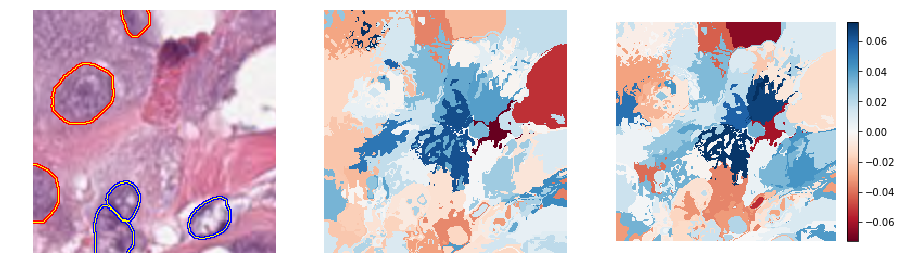

In [11]:
plt.rcParams['figure.figsize']=(20,10)
plt.subplot(1,4,1)
#plt.figure(facecolor='white')
plt.imshow(mark)
plt.axis('off')
plt.subplot(1,4,2)
#plt.figure(facecolor='white')
plt.imshow(heatmap, cmap = 'RdBu', vmin=-heatmap.max(), vmax = heatmap.max())
#plt.title('max='+f'{heatmap.max():.3}')
#plt.colorbar()
#plt.colorbar(im,fraction=0.045)
plt.axis('off')
#plt.show()
plt.subplot(1,4,3)
#plt.figure(facecolor='white')
im=plt.imshow(heatmap2, cmap = 'RdBu', vmin=-heatmap2.max(), vmax = heatmap2.max())
#plt.title('max='+f'{heatmap.max():.3}')
#ax=plt.gca()
#from mpl_toolkits.axes_grid1 import make_axes_locatable
#divider = make_axes_locatable(ax)
plt.axis('off')
#plt.subplot(1,4,4)
#plt.axis('off')
#cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im,fraction=0.045)#,cax=cax)

#plt.show()heatmap2

In [44]:
#Generate LIME explanation for class 1
explainer = lime_image.LimeImageExplainer()
class_idx=1
explanation_genetic = explainer.explain_instance(im.copy(), 
                                                 model_with_preprocessing.predict, 
                                                 segmentation_fn = segfunc, 
                                                 top_labels=3,#Just making sure we generate explanations for both classes. Any number >2 should work. 
                                                 hide_color=0,#Cover superpixels in black. 
                                                 num_samples=200,
                                                 progress_bar=False)
dict_genetic = dict(explanation_genetic.local_exp[class_idx])
sharpheatmap = np.vectorize(dict_genetic.get)(explanation_genetic.segments)

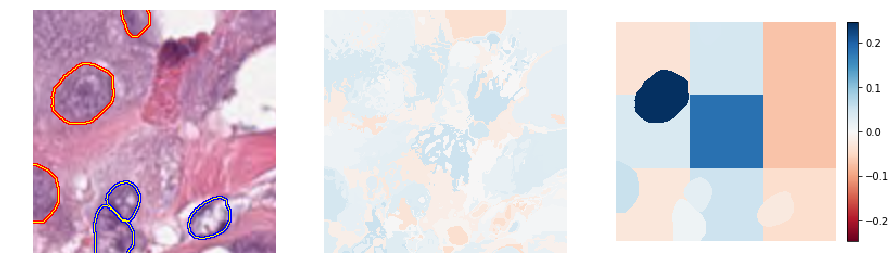

In [45]:
plt.rcParams['figure.figsize']=(20,10)
plt.subplot(1,4,1)
#plt.figure(facecolor='white')
plt.imshow(mark)
plt.axis('off')
plt.subplot(1,4,2)
#plt.figure(facecolor='white')
plt.imshow(heatmap, cmap = 'RdBu', vmin=-sharpheatmap.max(), vmax = sharpheatmap.max())
#plt.title('max='+f'{heatmap.max():.3}')
#plt.colorbar()
#plt.colorbar(im,fraction=0.045)
plt.axis('off')
#plt.show()
plt.subplot(1,4,3)
#plt.figure(facecolor='white')
im=plt.imshow(sharpheatmap, cmap = 'RdBu', vmin=-sharpheatmap.max(), vmax = sharpheatmap.max())
#plt.title('max='+f'{heatmap.max():.3}')
#ax=plt.gca()
#from mpl_toolkits.axes_grid1 import make_axes_locatable
#divider = make_axes_locatable(ax)
plt.axis('off')
#plt.subplot(1,4,4)
#plt.axis('off')
#cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im,fraction=0.045)#,cax=cax)

#plt.show()